In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from glob import glob

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


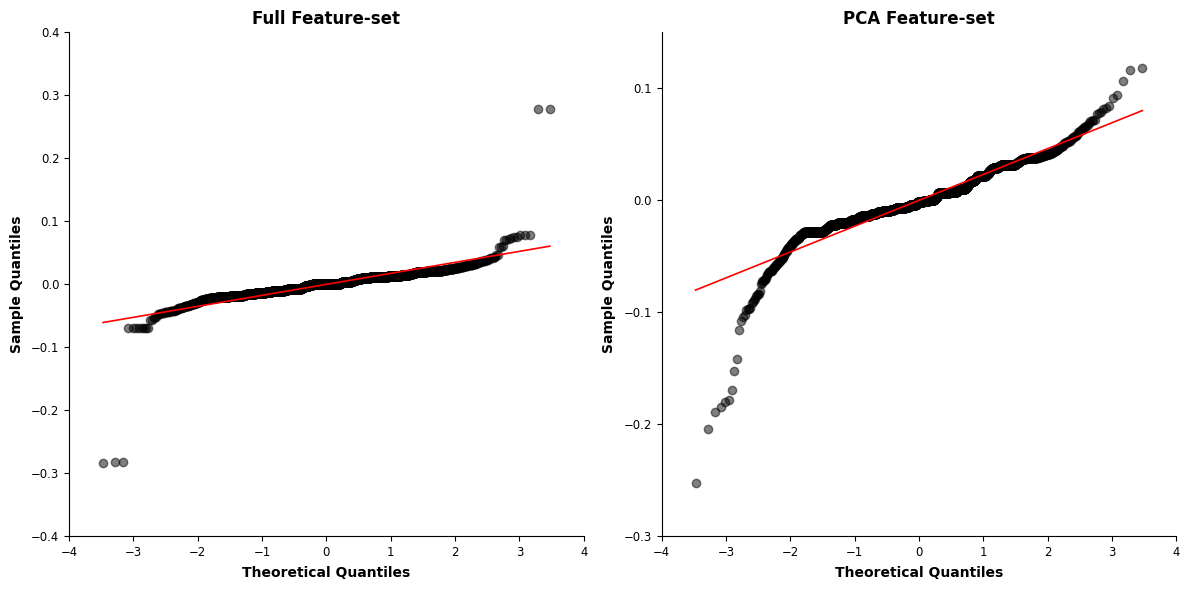

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# File paths to residual-augmented CSVs
pca_csv = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/PCA_run/all_features/analysis/roc_auc_with_residuals.csv"
non_pca_csv = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/No_PCA_run/all_features/analysis/roc_auc_with_residuals.csv"

# Load and label datasets
df_pca = pd.read_csv(pca_csv)
df_pca["group"] = "PCA Feature-set"

df_non_pca = pd.read_csv(non_pca_csv)
df_non_pca["group"] = "Full Feature-set"

# Combine both
combined_df = pd.concat([df_pca, df_non_pca], ignore_index=True)

# APA style optional
plt.style.use("/content/drive/MyDrive/NCU/Dissertation/apa.mplstyle")

# Create side-by-side Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (group, data) in zip(axes, combined_df.groupby("group")):
    sm.qqplot(data["roc_auc_residual"], line='s', ax=ax, alpha=0.5, color='black')
    ax.set_title(f"{group}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")

sns.despine()
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from scipy.stats import levene

# Load the summary data
csv_path = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/No_PCA_run/all_features/analysis/supervised__no_pca_summary_by_seed.csv"
df = pd.read_csv(csv_path)

# Define metrics
metrics = ["roc_auc", "accuracy", "precision", "recall", "f1"]

# Run Levene's test for each metric
levene_results = []
for metric in metrics:
    grouped = [group[metric].values for name, group in df.groupby("model")]
    stat, pval = levene(*grouped)
    levene_results.append({
        "metric": metric,
        "levene_stat": stat,
        "p_value": pval
    })

# Convert to DataFrame and display
levene_df = pd.DataFrame(levene_results)
print(levene_df)


      metric  levene_stat       p_value
0    roc_auc     7.051910  1.428335e-06
1   accuracy    16.583281  3.092946e-16
2  precision  1026.156093  0.000000e+00
3     recall    57.345138  1.021935e-57
4         f1   550.585990  0.000000e+00


In [21]:
import pandas as pd
from scipy.stats import levene

# Load the summary data
csv_path = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/PCA_run/all_features/analysis/supervised__pca_summary_by_seed.csv"
df = pd.read_csv(csv_path)

# Define metrics
metrics = ["roc_auc", "accuracy", "precision", "recall", "f1"]

# Run Levene's test for each metric
levene_results = []
for model in df['model'].unique():
    sub = df[df['model'] == model]
    for metric in metrics:
        groups = [g[metric].values for _, g in sub.groupby('cluster_condition')]
        stat, pval = levene(*groups)
        levene_results.append({
            "model": model,
            "metric": metric,
            "levene_stat": stat,
            "p_value": pval
        })

levene_df = pd.DataFrame(levene_results)

# Convert to DataFrame and display
levene_df = pd.DataFrame(levene_results)
print(levene_df)



          model     metric   levene_stat   p_value
0       xgboost    roc_auc  1.220497e-01  1.000000
1       xgboost   accuracy  6.915456e-02  1.000000
2       xgboost  precision  4.546083e-01  1.000000
3       xgboost     recall  8.495010e-02  1.000000
4       xgboost         f1  4.472152e-01  1.000000
5    neural_net    roc_auc  9.350208e-01  0.673408
6    neural_net   accuracy  8.999236e-01  0.763710
7    neural_net  precision  7.430250e-01  0.978981
8    neural_net     recall  8.315644e-01  0.897410
9    neural_net         f1  7.413619e-01  0.979730
10           rf    roc_auc  1.017984e-01  1.000000
11           rf   accuracy  1.058387e-01  1.000000
12           rf  precision  2.509113e-01  1.000000
13           rf     recall  5.841618e-02  1.000000
14           rf         f1  2.477280e-01  1.000000
15  naive_bayes    roc_auc  2.236276e-04  1.000000
16  naive_bayes   accuracy  3.731797e-04  1.000000
17  naive_bayes  precision  6.227169e-03  1.000000
18  naive_bayes     recall  1.2

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


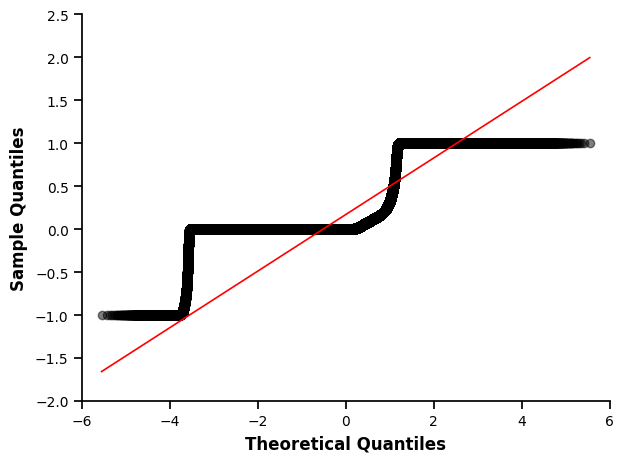

In [ ]:
# Load APA style
plt.style.use("/content/drive/MyDrive/NCU/Dissertation/apa.mplstyle")

# Q-Q plot of residuals
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Q-Q plot
sm.qqplot(residuals_df["residual"], line='s', alpha=0.5, color='black')

# Customize plot labels
#plt.title("Q-Q Plot of Residuals", fontsize=12)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# APA styling adjustments
sns.despine()
plt.tight_layout()

# Save figure
plt.savefig("qq_plot_residuals_apa.png", dpi=300)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


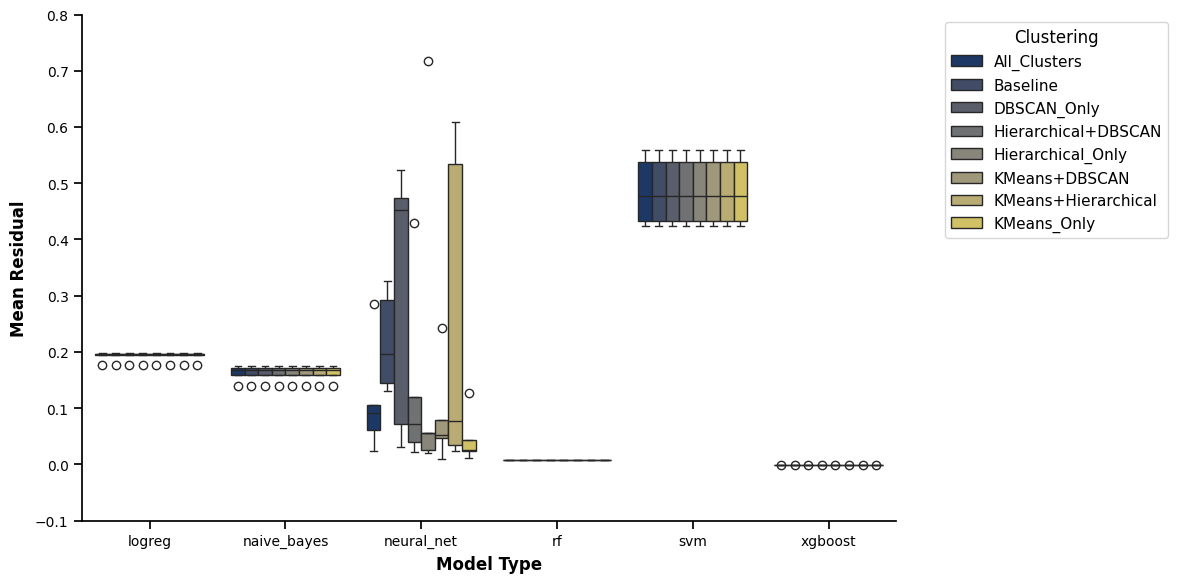

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load APA style
import matplotlib.pyplot as plt
plt.style.use('/content/drive/MyDrive/NCU/Dissertation/apa.mplstyle')

# Import libraries
import pandas as pd
import seaborn as sns
import os
from glob import glob
import numpy as np

# Set path to predictions
path = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/ANOVA_DIAGNOSTICS"  # Update if needed
all_files = glob(os.path.join(path, "*_predictions.csv"))

# Collect residual data from each file
residuals = []
for file in all_files:
    df = pd.read_csv(file)
    df['residual'] = df['y_proba'] - df['y_true']

    # Extract model_type, clustering strategy, and seed
    base = os.path.basename(file).replace("_predictions.csv", "")
    parts = base.split("_")

    model_type = parts[0] + "_" + parts[1] if parts[0] in ["naive", "neural"] else parts[0]
    seed_parts = [p for p in parts if p.startswith("seed")]
    seed = int(seed_parts[0].replace("seed", "")) if seed_parts else -1
    clustering_parts = [p for p in parts if p not in model_type.split("_") and not p.startswith("seed")]
    clustering = "_".join(clustering_parts)

    df['model_type'] = model_type
    df['clustering'] = clustering
    df['seed'] = seed
    df['group'] = model_type + " + " + clustering
    residuals.append(df)

# Combine all residuals
df_all = pd.concat(residuals)

# Average residuals within each model + clustering + seed group for visualization only
grouped = (
    df_all
    .groupby(['model_type', 'clustering', 'seed'])['residual']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=grouped,
    x='model_type',
    y='residual',
    hue='clustering',
    palette='cividis'
)

#plt.title("Residual Distributions by Model and Clustering Strategy")
plt.xlabel("Model Type")
plt.ylabel("Mean Residual")
plt.legend(title="Clustering", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/NCU/Dissertation/figures/residuals_model_cluster_apa.png", dpi=300)
plt.show()


In [ ]:
# Levene’s Test for Homogeneity of Variance
groups = [group["residual"].values for _, group in residuals_df.groupby("group")]
levene_stat, levene_p = stats.levene(*groups)
print(f"Levene's Test: W = {levene_stat:.4f}, p = {levene_p:.4f}")

Levene's Test: W = 103773.2473, p = 0.0000


In [ ]:
%cd "/content/drive/MyDrive/NCU/Dissertation/Scripts/supervised_modeling"

/content/drive/MyDrive/NCU/Dissertation/Scripts/supervised_modeling


In [ ]:
!python two_anova.py


ANOVA Results for roc_auc:
                                  sum_sq     df            F         PR(>F)
C(model)                       4.238653    5.0  1044.517727  4.069632e-137
C(cluster_condition)           0.002604    7.0     0.458326   8.636369e-01
C(model):C(cluster_condition)  0.012858   35.0     0.452652   9.966527e-01
Residual                       0.155827  192.0          NaN            NaN

ANOVA Results for accuracy:
                                  sum_sq     df           F        PR(>F)
C(model)                       6.651352    5.0  199.148915  5.863149e-74
C(cluster_condition)           0.046795    7.0    1.000790  4.320383e-01
C(model):C(cluster_condition)  0.233983   35.0    1.000815  4.748147e-01
Residual                       1.282517  192.0         NaN           NaN

ANOVA Results for precision:
                                  sum_sq     df           F         PR(>F)
C(model)                       4.020103    5.0  778.582988  2.241362e-125
C(cluster_condition)  

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load dataset
csv_path = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/analysis/supervised_summary_by_seed.csv"
df = pd.read_csv(csv_path)

# Metrics and models
metrics = ["roc_auc", "accuracy", "precision", "recall", "f1"]
models = df['model'].unique()

# Collect results in a dictionary
anova_summary_by_model = {}

for model_name in models:
    model_df = df[df['model'] == model_name]
    summary = []

    for metric in metrics:
        formula = f"{metric} ~ C(cluster_condition)"
        model = ols(formula, data=model_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        f_val = anova_table.loc["C(cluster_condition)", "F"]
        p_val = anova_table.loc["C(cluster_condition)", "PR(>F)"]

        summary.append({
            "Metric": metric,
            "F-Statistic": round(f_val, 4),
            "p-Value": round(p_val, 6)
        })

    anova_summary_by_model[model_name] = pd.DataFrame(summary)

# Example: Display or save the table for a specific model
model_to_display = "rf"  # change as needed
anova_summary_by_model[model_to_display]


,Metric,F-Statistic,p-Value
0,roc_auc,0.0,1.0
1,accuracy,0.0,1.0
2,precision,0.0,1.0
3,recall,0.0,1.0
4,f1,0.0,1.0


In [ ]:
# Install Pingouin if not already installed
!pip install pingouin --quiet


# Import libraries
import pandas as pd
import pingouin as pg

# === Load your data ===
# Adjust the path if needed
csv_path = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/analysis/supervised_summary_by_seed.csv"
df = pd.read_csv(csv_path)

# === Filter to neural_net only ===
neural_df = df[df['model'] == 'neural_net'].copy()

# === Compute ICC ===
# We want to assess whether different seeds (raters) are consistent within each cluster condition
# So: target is 'cluster_condition', rater is 'seed', and score is your metric (e.g., 'f1')

icc_result = pg.intraclass_corr(data=neural_df,
                                targets='cluster_condition',
                                raters='seed',
                                ratings='f1')

# Display the ICC results
print(icc_result[['Type', 'ICC', 'F', 'pval', 'CI95%']])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.3 MB/s eta 0:00:00
    Type       ICC         F      pval          CI95%
0   ICC1  0.105353  1.588799  0.174515  [-0.09, 0.54]
1   ICC2  0.101596  1.552513  0.190846   [-0.1, 0.54]
2   ICC3  0.099507  1.552513  0.190846   [-0.1, 0.54]
3  ICC1k  0.370594  1.588799  0.174515  [-0.71, 0.86]
4  ICC2k  0.361197  1.552513  0.190846   [-0.8, 0.86]
5  ICC3k  0.355883  1.552513  0.190846  [-0.79, 0.85]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


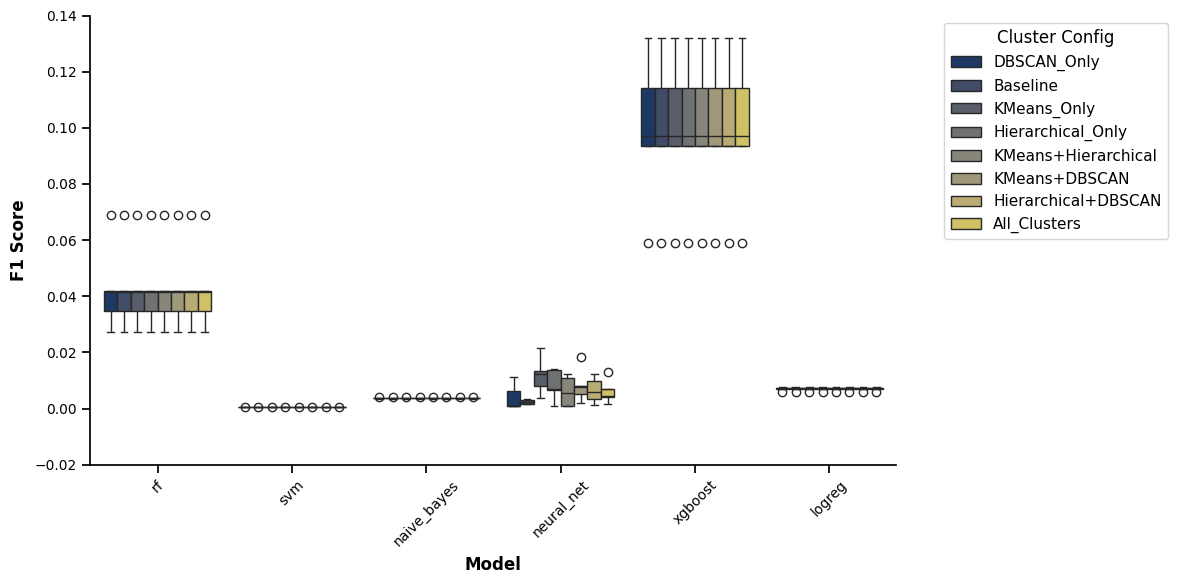

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
csv_path = "/content/drive/MyDrive/NCU/Dissertation/Results/Supervised/analysis/supervised_summary_by_seed.csv"
df = pd.read_csv(csv_path)

# Plot setup
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='model', y='f1', hue='cluster_condition', palette='cividis')

# Formatting
#plt.title("F1 Score Distribution by Model and Clustering Configuration")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.legend(title="Cluster Config", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
%cd "/content/drive/MyDrive/NCU/Dissertation/Scripts/Unsupervised/"

[Errno 2] No such file or directory: '/content/drive/MyDrive/NCU/Dissertation/Scripts/Unsupervised/'
/content/drive/MyDrive/NCU/Dissertation/Scripts/Clustering


In [ ]:
!python cluster_merge.py

 Saved: X_pca_augmented.pkl with selected cluster features
